# GHCN data
## Averages
Checking averages

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

In [4]:
%%time
full_temp_df = pd.read_csv("./../data/ghcn_temps.csv")

CPU times: user 31.8 s, sys: 2.2 s, total: 34 s
Wall time: 35.3 s


In [5]:
full_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37122087 entries, 0 to 37122086
Data columns (total 10 columns):
Unnamed: 0    int64
ID            object
YEAR          int64
MONTH         int64
ELEMENT       object
var           object
temp_c        int64
day           int64
temp_f        float64
date          object
dtypes: float64(1), int64(5), object(4)
memory usage: 10.6 GB


In [7]:
%%time
avg_temp_df = full_temp_df.groupby(["date","ELEMENT"], as_index = False).agg({"temp_f": "mean"})

CPU times: user 3.96 s, sys: 425 ms, total: 4.38 s
Wall time: 4.38 s


In [16]:
len(avg_temp_df)

136614

In [8]:
avg_temp_df.head()

,date,ELEMENT,temp_f
0,1833-01-02,TMAX,29.48
1,1833-01-02,TMIN,23.36
2,1833-01-03,TMAX,26.42
3,1833-01-03,TMIN,19.76
4,1833-01-04,TMAX,24.98


In [10]:
avg_temp_df[avg_temp_df.date == "1990-01-01"]

,date,ELEMENT,temp_f
114684,1990-01-01,TMAX,47.299196
114685,1990-01-01,TMIN,31.151620


In [11]:
avg_temp_df[avg_temp_df.date == "2010-01-01"]

,date,ELEMENT,temp_f
129294,2010-01-01,TMAX,44.085156
129295,2010-01-01,TMIN,27.173635


In [18]:
avg_temp_df[(avg_temp_df["date"].str.split("-")[0] == "2010") & (avg_temp_df.ELEMENT == "TMAX")].temp_f

Series([], Name: temp_f, dtype: float64)

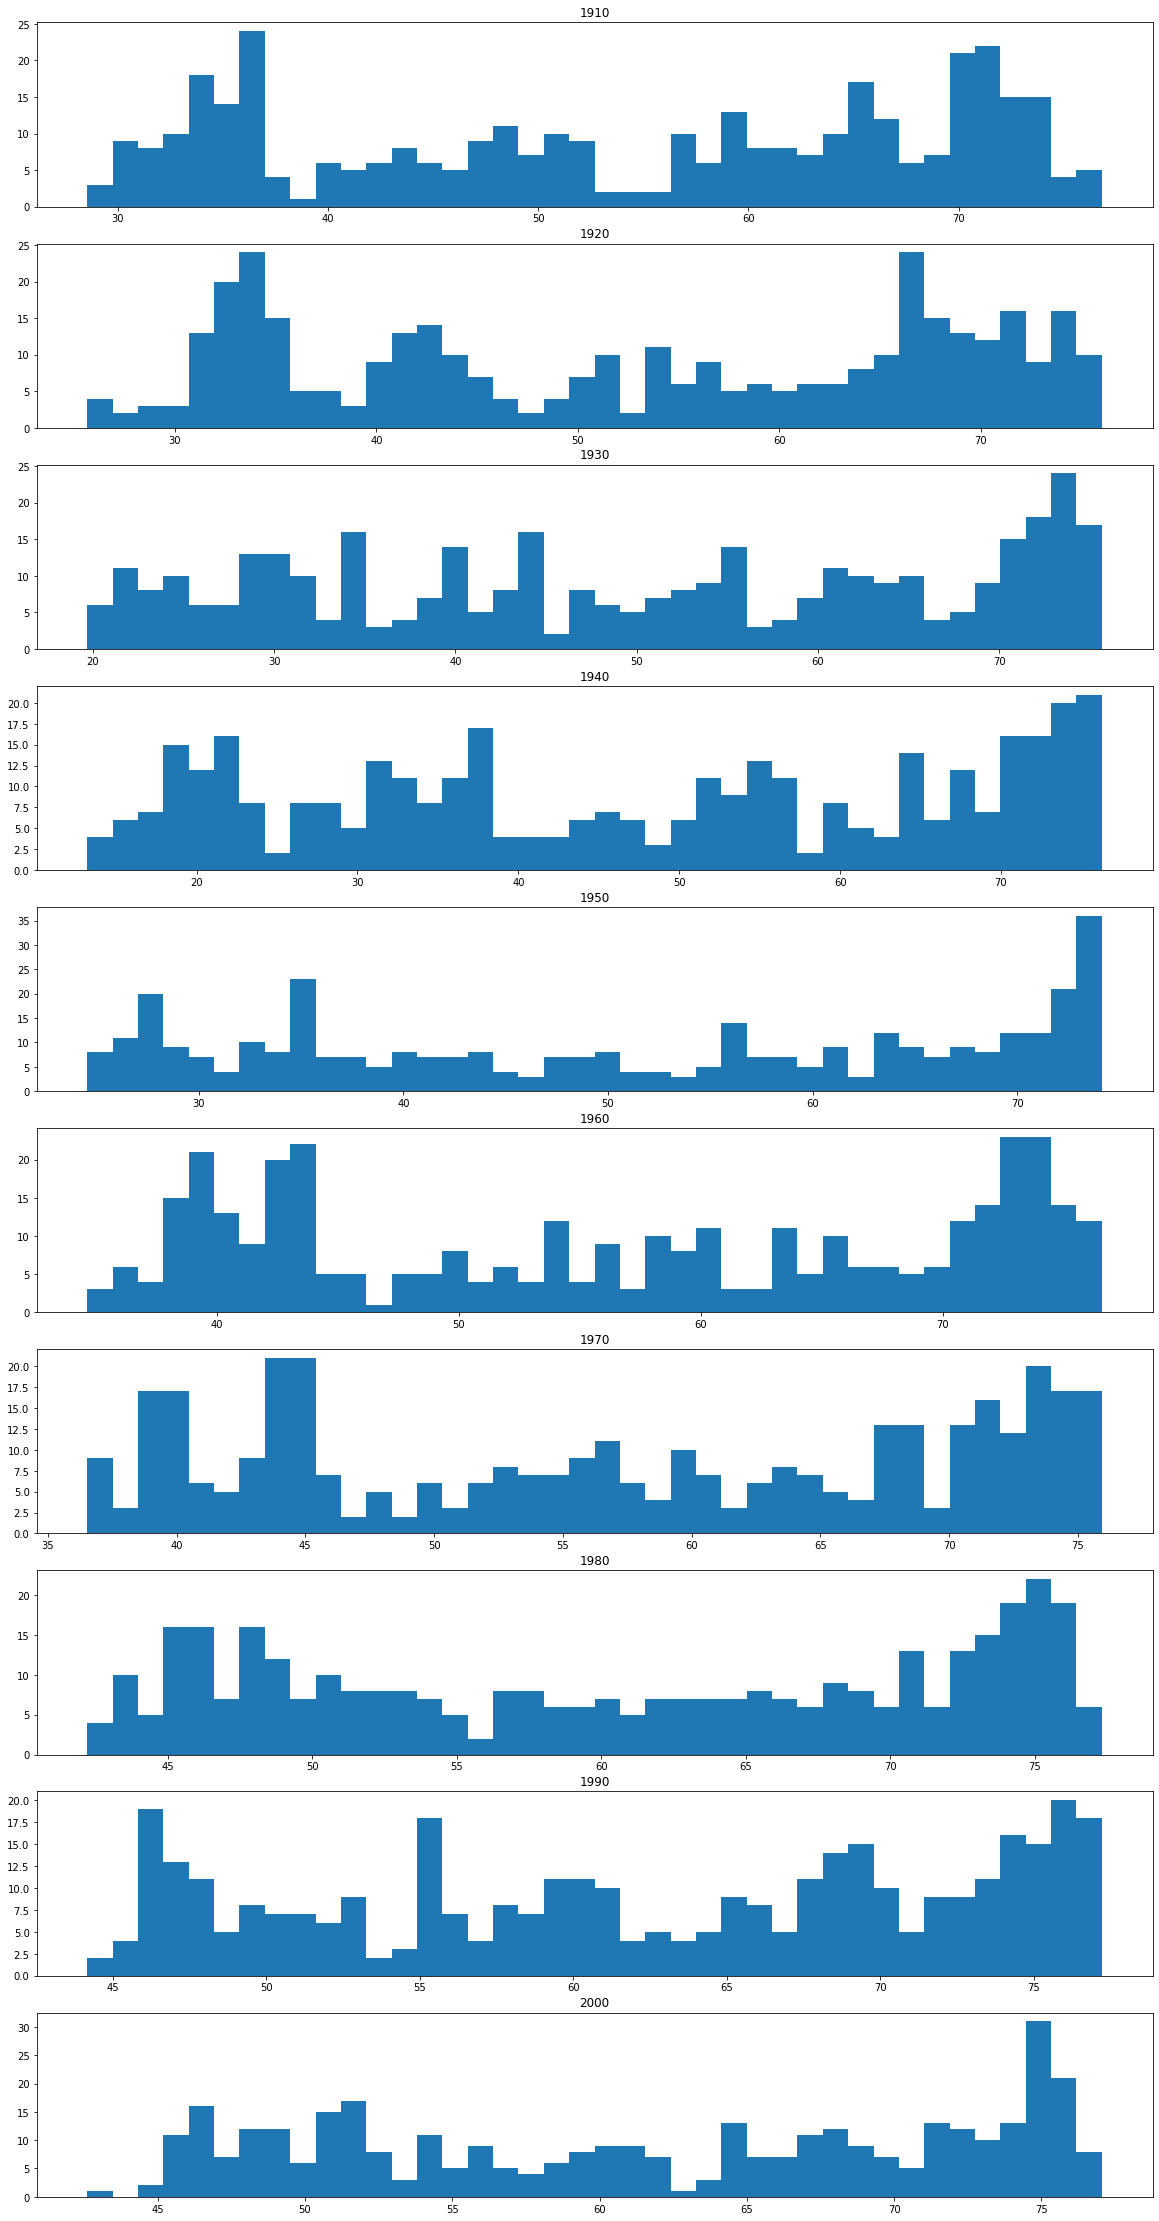

In [29]:
fig, ax = plt.subplots(figsize = (20, 40), nrows = 10)
for i in range(10):
    ax[i].hist(avg_temp_df[(avg_temp_df["date"].str.split("-").map(lambda x: x[0]) == str(1910 + 10 * i)) & (avg_temp_df.ELEMENT == "TMAX")].temp_f, bins = 40)
    ax[i].set_title(str(1910 + 10 * i))